In [137]:
#!/usr/bin/python3

#Imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from IPython.display import Image


In [2]:
# Load Lawful Permanent Residents 2020 Data Tables
# Data from: https://www.dhs.gov/immigration-statistics/yearbook/2020
directory = "./data/lawful2020/"

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table1_in = pd.read_excel(directory + "fy2020_table1.xlsx", skiprows=3, nrows=60)

# Reformat into 2 columns: Year and Number
lawful2020_table1 = pd.DataFrame(columns=['Year', 'Number'])
lawful2020_table1['Year'] = lawful2020_table1_in['Year']
lawful2020_table1['Number'] = lawful2020_table1_in['Number']
for i in range(3):
    temp = pd.DataFrame(columns=['Year','Number'])
    current_col_year = 'Year.' + str(i + 1)
    current_col_number = 'Number.' + str(i + 1)
    temp['Year'] = lawful2020_table1_in[current_col_year]
    temp['Number'] = lawful2020_table1_in[current_col_number]
    lawful2020_table1 = pd.concat([lawful2020_table1, temp])
    
# Remove rows with NaN
lawful2020_table1 = lawful2020_table1.dropna()

# Modify one instance of a string
lawful2020_table1.loc[lawful2020_table1['Year'] == "1976¹"] = 1976

print(lawful2020_table1.describe())

             Number
count  2.010000e+02
mean   4.288578e+05
std    3.651173e+05
min    1.976000e+03
25%    1.411320e+05
50%    3.216250e+05
75%    6.033220e+05
max    1.826595e+06


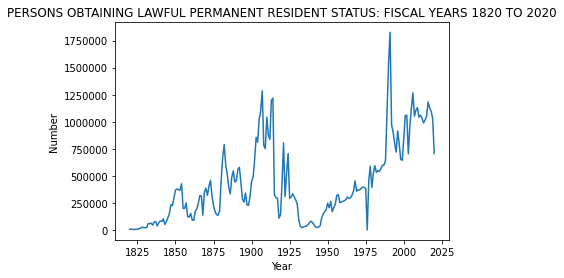

In [3]:
# Plot simple chart
plt.plot(lawful2020_table1['Year'], lawful2020_table1['Number'])
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020")
plt.ticklabel_format(style='plain')
plt.show()

Here, we can see a general upward trend for persons obtaining lawful permanent resident status over the past 200 years in the United States.

In [4]:
# Load Lawful Permanent Residents 2020 Supplementary Data Tables

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table2_in = pd.read_excel(directory + "fy2020_table2.xlsx", skiprows=3, nrows=88)
df = lawful2020_table2_in

# Make sure all column names are strings (2020 label saved as int)
df = df.rename(columns={2020:'2020'})

# Rename a column
df = df.rename(columns={"Region and country of last residence1": "Region"})

# Rename a row element
df.iloc[87]['Region'] = 'Not Specified'

# Replace NaN with 0, replace dashes with 0
df = df.fillna(0)
df.loc[:, df.columns != 'Region'] = df.loc[:, df.columns != 'Region'].replace('-',0, regex=True)

# Combine 2010-2019 and 2020 columns
df['2010 to 2020'] = df['2010 to 2019'] + df['2020']

# Remove a column
df = df.drop('2010 to 2019', axis=1)
df = df.drop('2020', axis=1)

print(df.head())

               Region 1820 to 1829 1830 to 1839 1840 to 1849 1850 to 1859  \
0               Total       128502       538381      1427337      2814554   
1              Europe        99618       422853      1369423      2622617   
2  Austria-Hungary2,3            0            0            0            0   
3          Austria2,3            0            0            0            0   
4          Hungary2,3            0            0            0            0   

  1860 to 1869 1870 to 1879 1880 to 1889 1890 to 1899 1900 to 1909  ...  \
0      2081261      2742137      5248568      3694294      8202388  ...   
1      1880389      2252050      4638684      3576411      7572569  ...   
2         3375        60127       314787       534059      2001376  ...   
3         2700        54529       204805       268218       532416  ...   
4          483         5598       109982       203350       685567  ...   

  1920 to 1929 1930 to 1939 1940 to 1949 1950 to 1959 1960 to 1969  \
0      4295510  

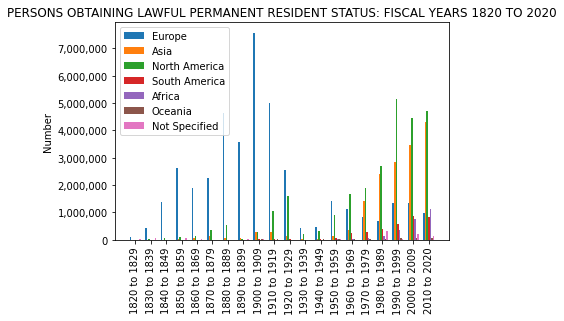

In [5]:
# Create plot of persons by continent

continent_data = df[(df['Region'] == 'Europe') | (df['Region'] == 'Asia') | (df['Region'] == 'America') | (df['Region'] == 'South America') | (df['Region'] == 'Africa') | (df['Region'] == 'Oceania') | (df['Region'] == 'Not Specified')]

labels = continent_data.iloc[:, 0].tolist()
europe_data = continent_data.iloc[0,1:].tolist()
asia_data = continent_data.iloc[1,1:].tolist()
america_data = continent_data.iloc[2,1:].tolist()
sa_data = continent_data.iloc[3,1:].tolist()
africa_data = continent_data.iloc[4,1:].tolist()
oceania_data = continent_data.iloc[5,1:].tolist()
other_data = continent_data.iloc[6,1:].tolist()

bar_labels = continent_data.columns.tolist()
bar_labels = bar_labels[1:]

x = np.arange(len(europe_data))
width = 0.1
fig, ax = plt.subplots()

europe_bars = ax.bar((x - (3 * width)), europe_data, width, label='Europe')
asia_bars = ax.bar((x - (2 * width)), asia_data, width, label='Asia')
america_bars = ax.bar((x - (1 * width)), america_data, width, label='North America')
sa_bars = ax.bar(x, sa_data, width, label='South America')
africa_bars = ax.bar((x + (1 * width)), africa_data, width, label='Africa')
oceania_bars = ax.bar((x + (2 * width)), oceania_data, width, label='Oceania')
other_bars = ax.bar((x + (3 * width)), other_data, width, label='Not Specified')

ax.set_xticks(x, bar_labels, rotation='vertical')
ax.set_ylabel('Number')
ax.set_title('PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020')
ax.legend()

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, a: format(int(x), ',')))

plt.show()


You'll have to zoom in to properly see the bars, but we can see general immigration trends by continent over the past 200 years.

In [ ]:
# Data from: https://data.census.gov/cedsci/table?q=nationality&tid=ACSDP5Y2020.DP02

           Ancestry      Number Margin of Error Percent  \
0          American  19,364,103         ±65,490    5.9%   
1              Arab   2,056,594         ±27,520    0.6%   
2             Czech   1,329,130         ±11,870    0.4%   
3            Danish   1,244,498         ±12,074    0.4%   
4             Dutch   3,692,889         ±18,347    1.1%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

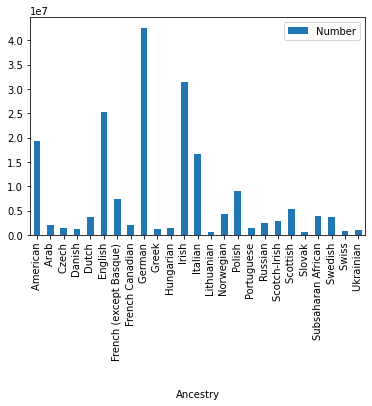

In [33]:
# Load ancestry census data from 2020

# Import correct sheet in file
df_2020 = pd.read_csv('./data/5yr/2020_5yr.csv', skiprows=141, nrows = 25)
df_2020.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2020.head())
labels_2020 = df_2020['Ancestry'][1:]
population_data_2020 = df_2020['Number'][1:]
df_2020.replace(',','', regex=True, inplace=True)
df_2020['Number'] = df_2020['Number'].astype(int)
df_2020.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,266,321         ±62,729    6.2%   
1              Arab   2,009,626         ±28,918    0.6%   
2             Czech   1,358,610          ±9,400    0.4%   
3            Danish   1,265,727         ±10,337    0.4%   
4             Dutch   3,872,651         ±18,708    1.2%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

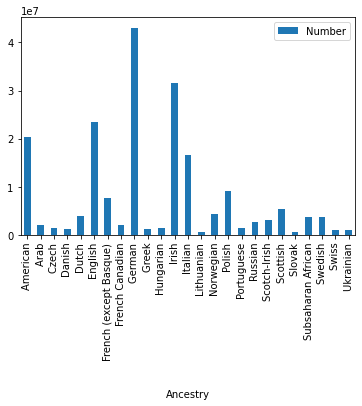

In [36]:
# Load ancestry census data from 2019

# Import correct sheet in file
df_2019 = pd.read_csv('./data/5yr/2019_5yr.csv', skiprows=140, nrows = 25)
df_2019.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2019.head())
labels_2019 = df_2019['Ancestry'][1:]
population_data_2019 = df_2019['Number'][1:]
df_2019.replace(',','', regex=True, inplace=True)
df_2019['Number'] = df_2019['Number'].astype(int)
df_2019.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,678,613         ±60,777    6.4%   
1              Arab   1,979,363         ±26,183    0.6%   
2             Czech   1,382,835          ±9,921    0.4%   
3            Danish   1,278,457          ±9,713    0.4%   
4             Dutch   4,009,279         ±19,942    1.2%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

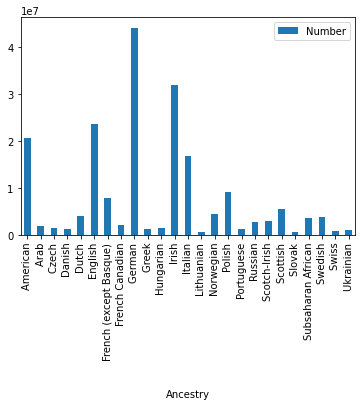

In [38]:
# Load ancestry census data from 2018


# Import correct sheet in file
df_2018 = pd.read_csv('./data/5yr/2018_5yr.csv', skiprows=139, nrows = 25)
df_2018.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names

print(df_2018.head())
labels_2018 = df_2018['Ancestry'][1:]
population_data_2018 = df_2018['Number'][1:]
df_2018.replace(',','', regex=True, inplace=True)
df_2018['Number'] = df_2018['Number'].astype(int)
df_2018.plot(x="Ancestry", y=["Number"], kind="bar")


           Ancestry      Number Margin of Error Percent  \
0          American  21,227,906         ±54,727    6.6%   
1              Arab   1,920,562         ±26,249    0.6%   
2             Czech   1,410,576          ±9,770    0.4%   
3            Danish   1,294,689         ±10,692    0.4%   
4             Dutch   4,121,110         ±18,904    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

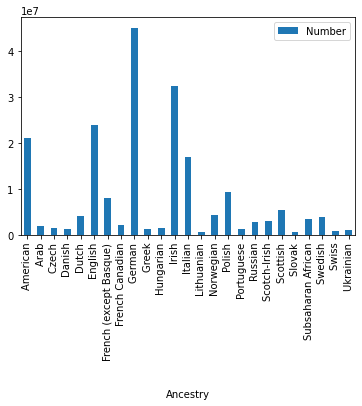

In [39]:
# Load ancestry census data from 2017


# Import correct sheet in file
df_2017 = pd.read_csv('./data/5yr/2017_5yr.csv', skiprows=139, nrows = 25)
df_2017.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names

print(df_2017.head())
labels_2017 = df_2017['Ancestry'][1:]
population_data_2017 = df_2017['Number'][1:]
df_2017.replace(',','', regex=True, inplace=True)
df_2017['Number'] = df_2017['Number'].astype(int)
df_2017.plot(x="Ancestry", y=["Number"], kind="bar")


           Ancestry      Number Margin of Error Percent  \
0          American  21,961,129         ±59,333    6.9%   
1              Arab   1,883,456         ±23,581    0.6%   
2             Czech   1,435,359          ±8,933    0.5%   
3            Danish   1,297,738         ±11,493    0.4%   
4             Dutch   4,210,787         ±18,159    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

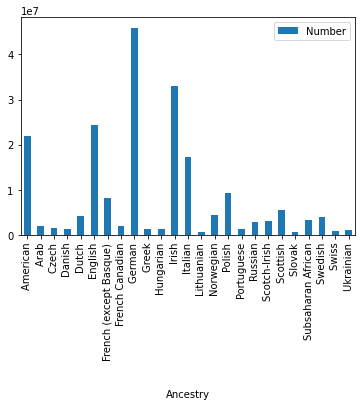

In [40]:
# Load ancestry census data from 2016


# Import correct sheet in file
df_2016 = pd.read_csv('./data/5yr/2016_5yr.csv', skiprows=139, nrows = 25)
df_2016.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2016.head())
labels_2016 = df_2016['Ancestry'][1:]
population_data_2016 = df_2016['Number'][1:]
df_2016.replace(',','', regex=True, inplace=True)
df_2016['Number'] = df_2016['Number'].astype(int)
df_2016.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  22,746,991         ±50,437    7.2%   
1              Arab   1,832,106         ±23,840    0.6%   
2             Czech   1,452,344         ±10,370    0.5%   
3            Danish   1,307,381          ±9,289    0.4%   
4             Dutch   4,289,116         ±17,121    1.4%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

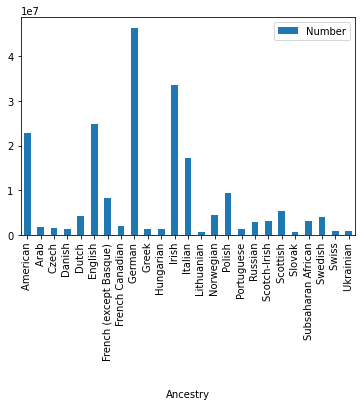

In [41]:
# Load ancestry census data from 2015


# Import correct sheet in file
df_2015 = pd.read_csv('./data/5yr/2015_5yr.csv', skiprows=139, nrows = 25)
df_2015.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2015.head())
labels_2015 = df_2015['Ancestry'][1:]
population_data_2015 = df_2015['Number'][1:]
df_2015.replace(',','', regex=True, inplace=True)
df_2015['Number'] = df_2015['Number'].astype(int)
df_2015.plot(x="Ancestry", y=["Number"], kind="bar")


           Ancestry      Number Margin of Error Percent  \
0          American  22,365,250         ±53,443    7.1%   
1              Arab   1,769,645         ±20,573    0.6%   
2             Czech   1,479,588         ±11,823    0.5%   
3            Danish   1,323,182         ±10,809    0.4%   
4             Dutch   4,387,814         ±18,649    1.4%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

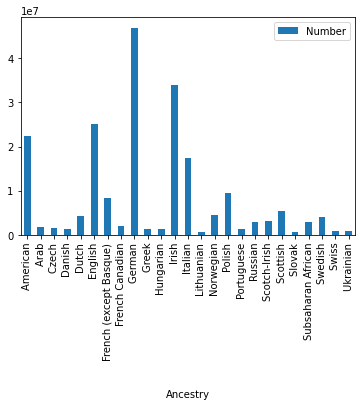

In [42]:
# Load ancestry census data from 2014


# Import correct sheet in file
df_2014 = pd.read_csv('./data/5yr/2014_5yr.csv', skiprows=139, nrows = 25)
df_2014.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2014.head())
labels_2014 = df_2014['Ancestry'][1:]
population_data_2014 = df_2014['Number'][1:]
df_2014.replace(',','', regex=True, inplace=True)
df_2014['Number'] = df_2014['Number'].astype(int)
df_2014.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  21,659,006         ±42,199    7.0%   
1              Arab   1,710,927         ±19,118    0.5%   
2             Czech   1,514,919         ±11,653    0.5%   
3            Danish   1,360,858         ±10,385    0.4%   
4             Dutch   4,533,617         ±17,674    1.5%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

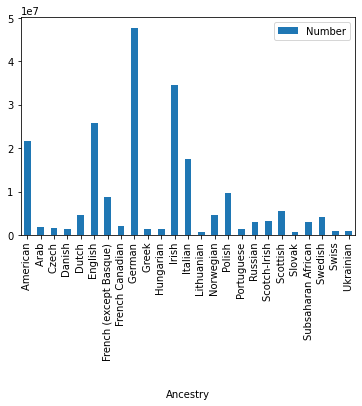

In [43]:
# Load ancestry census data from 2013

# Import correct sheet in file
df_2013 = pd.read_csv('./data/5yr/2013_5yr.csv', skiprows=139, nrows = 25)
df_2013.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2013.head())
labels_2013 = df_2013['Ancestry'][1:]
population_data_2013 = df_2013['Number'][1:]
df_2013.replace(',','', regex=True, inplace=True)
df_2013['Number'] = df_2013['Number'].astype(int)
df_2013.plot(x="Ancestry", y=["Number"], kind="bar")


       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  20,775,461         ±45,958    6.7%                    ±0.1
1          Arab   1,646,808         ±18,400    0.5%                    ±0.1
2         Czech   1,543,224         ±10,124    0.5%                    ±0.1
3        Danish   1,392,161         ±12,510    0.5%                    ±0.1
4         Dutch   4,665,736         ±18,344    1.5%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

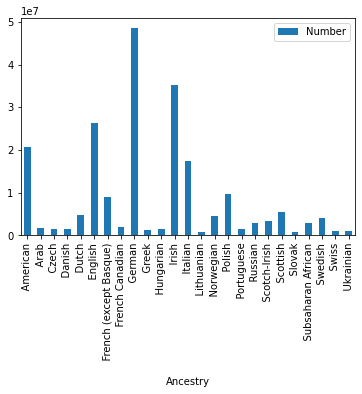

In [44]:
# Load ancestry census data from 2012


# Import correct sheet in file
df_2012 = pd.read_csv('./data/5yr/2012_5yr.csv', skiprows=139, nrows = 25)
df_2012.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']


print(df_2012.head())
labels_2012 = df_2012['Ancestry'][1:]
population_data_2012 = df_2012['Number'][1:]
df_2012.replace(',','', regex=True, inplace=True)
df_2012['Number'] = df_2012['Number'].astype(int)
df_2012.plot(x="Ancestry", y=["Number"], kind="bar")


       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  19,911,467         ±47,204    6.5%                    ±0.1
1          Arab   1,584,874         ±19,442    0.5%                    ±0.1
2         Czech   1,569,839         ±11,579    0.5%                    ±0.1
3        Danish   1,420,962         ±10,652    0.5%                    ±0.1
4         Dutch   4,809,836         ±18,659    1.6%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

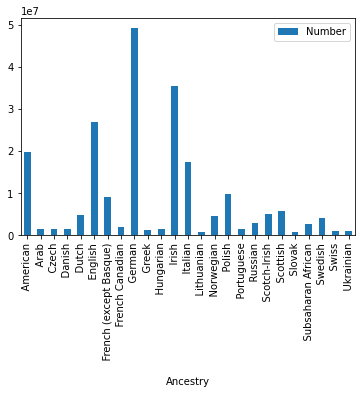

In [45]:
# Load ancestry census data from 2011


# Import correct sheet in file
df_2011 = pd.read_csv('./data/5yr/2011_5yr.csv', skiprows=139, nrows = 25)
df_2011.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']


print(df_2011.head())
labels_2011 = df_2011['Ancestry'][1:]
population_data_2011 = df_2011['Number'][1:]
df_2011.replace(',','', regex=True, inplace=True)
df_2011['Number'] = df_2011['Number'].astype(int)
df_2011.plot(x="Ancestry", y=["Number"], kind="bar")

       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  19,094,109         ±43,520    6.3%                    ±0.1
1          Arab   1,517,664         ±17,397    0.5%                    ±0.1
2         Czech   1,595,844         ±11,247    0.5%                    ±0.1
3        Danish   1,453,897         ±10,251    0.5%                    ±0.1
4         Dutch   4,950,041         ±20,785    1.6%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

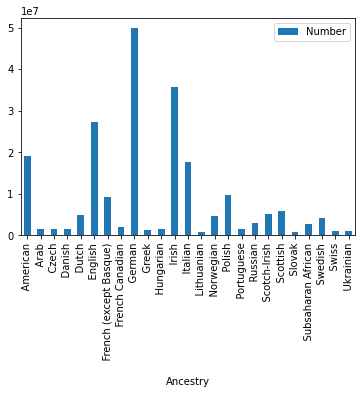

In [47]:
# Load ancestry census data from 2010

# Import correct sheet in file
df_2010 = pd.read_csv('./data/5yr/2010_5yr.csv', skiprows=139, nrows = 25)
df_2010.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2010.head())
labels_2010 = df_2010['Ancestry'][1:]
population_data_2010 = df_2010['Number'][1:]
df_2010.replace(',','', regex=True, inplace=True)
df_2010['Number'] = df_2010['Number'].astype(int)
df_2010.plot(x="Ancestry", y=["Number"], kind="bar")



CREATE A DATAFRAME WITH COLUMNS FOR EACH YEAR AND ROWS FOR ORIGIN/ANCESTRY

In [105]:
df_joined = pd.DataFrame()

In [106]:
df_joined['Ancestry'] = df_2020['Ancestry']
df_joined['N_2010'] = df_2010['Number']
df_joined['N_2011'] = df_2011['Number']
df_joined['N_2012'] = df_2012['Number']
df_joined['N_2013'] = df_2013['Number']
df_joined['N_2014'] = df_2014['Number']
df_joined['N_2015'] = df_2015['Number']
df_joined['N_2016'] = df_2016['Number']
df_joined['N_2017'] = df_2017['Number']
df_joined['N_2018'] = df_2018['Number']
df_joined['N_2019'] = df_2019['Number']
df_joined['N_2020'] = df_2020['Number']


In [107]:
df_joined

,Ancestry,N_2010,N_2011,N_2012,N_2013,N_2014,N_2015,N_2016,N_2017,N_2018,N_2019,N_2020
0,American,19094109,19911467,20775461,21659006,22365250,22746991,21961129,21227906,20678613,20266321,19364103
1,Arab,1517664,1584874,1646808,1710927,1769645,1832106,1883456,1920562,1979363,2009626,2056594
2,Czech,1595844,1569839,1543224,1514919,1479588,1452344,1435359,1410576,1382835,1358610,1329130
3,Danish,1453897,1420962,1392161,1360858,1323182,1307381,1297738,1294689,1278457,1265727,1244498
4,Dutch,4950041,4809836,4665736,4533617,4387814,4289116,4210787,4121110,4009279,3872651,3692889
5,English,27403063,26922124,26360639,25809471,25181294,24787018,24426623,23977180,23638645,23493906,25213619
6,French (except Basque),9326180,9135933,8902996,8678917,8431568,8272538,8151499,7997196,7815721,7606589,7374976
7,French Canadian,2138601,2087970,2052405,2061608,2052979,2059482,2084903,2109242,2095503,2074567,1998012
8,German,49836146,49202203,48478298,47715461,46874293,46403053,45879360,45153215,44164758,43038145,42589571
9,Greek,1337511,1319128,1308335,1300818,1285866,1284473,1282655,1272806,1273100,1265177,1249194


In [108]:
df_joined_T = df_joined.transpose()


In [109]:
df_joined_T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Ancestry,American,Arab,Czech,Danish,Dutch,English,French (except Basque),French Canadian,German,Greek,...,Polish,Portuguese,Russian,Scotch-Irish,Scottish,Slovak,Subsaharan African,Swedish,Swiss,Ukrainian
N_2010,19094109,1517664,1595844,1453897,4950041,27403063,9326180,2138601,49836146,1337511,...,9835459,1426121,3072756,5227821,5821321,805282,2763624,4293208,1003505,956896
N_2011,19911467,1584874,1569839,1420962,4809836,26922124,9135933,2087970,49202203,1319128,...,9739640,1422191,3060143,5102732,5706263,786108,2828270,4211644,982909,958294
N_2012,20775461,1646808,1543224,1392161,4665736,26360639,8902996,2052405,48478298,1308335,...,9670197,1409262,3013959,3317115,5580121,769697,2886972,4155453,967123,960902
N_2013,21659006,1710927,1514919,1360858,4533617,25809471,8678917,2061608,47715461,1300818,...,9596630,1404692,2964169,3212402,5485459,754862,2931557,4067207,951617,958662
N_2014,22365250,1769645,1479588,1323182,4387814,25181294,8431568,2052979,46874293,1285866,...,9452375,1380904,2895600,3102082,5401397,735757,2987143,3984136,936806,963549
N_2015,22746991,1832106,1452344,1307381,4289116,24787018,8272538,2059482,46403053,1284473,...,9385766,1372141,2843400,3046005,5409343,725457,3119177,3933024,929291,973257
N_2016,21961129,1883456,1435359,1297738,4210787,24426623,8151499,2084903,45879360,1282655,...,9344126,1367476,2795443,3056848,5457798,714557,3232142,3908762,937376,986597
N_2017,21227906,1920562,1410576,1294689,4121110,23977180,7997196,2109242,45153215,1272806,...,9265548,1363703,2741864,3032134,5460745,700474,3402702,3847046,933084,995653
N_2018,20678613,1979363,1382835,1278457,4009279,23638645,7815721,2095503,44164758,1273100,...,9152819,1358190,2671995,3021077,5440934,688103,3589855,3788741,927539,1002367


In [110]:
df_joined_T = df_joined_T.rename(columns=df_joined_T.iloc[0])

In [111]:
df_joined_T.drop(index=df_joined_T.index[0], axis=0, inplace=True)


In [112]:
df_joined_T

,American,Arab,Czech,Danish,Dutch,English,French (except Basque),French Canadian,German,Greek,...,Polish,Portuguese,Russian,Scotch-Irish,Scottish,Slovak,Subsaharan African,Swedish,Swiss,Ukrainian
N_2010,19094109,1517664,1595844,1453897,4950041,27403063,9326180,2138601,49836146,1337511,...,9835459,1426121,3072756,5227821,5821321,805282,2763624,4293208,1003505,956896
N_2011,19911467,1584874,1569839,1420962,4809836,26922124,9135933,2087970,49202203,1319128,...,9739640,1422191,3060143,5102732,5706263,786108,2828270,4211644,982909,958294
N_2012,20775461,1646808,1543224,1392161,4665736,26360639,8902996,2052405,48478298,1308335,...,9670197,1409262,3013959,3317115,5580121,769697,2886972,4155453,967123,960902
N_2013,21659006,1710927,1514919,1360858,4533617,25809471,8678917,2061608,47715461,1300818,...,9596630,1404692,2964169,3212402,5485459,754862,2931557,4067207,951617,958662
N_2014,22365250,1769645,1479588,1323182,4387814,25181294,8431568,2052979,46874293,1285866,...,9452375,1380904,2895600,3102082,5401397,735757,2987143,3984136,936806,963549
N_2015,22746991,1832106,1452344,1307381,4289116,24787018,8272538,2059482,46403053,1284473,...,9385766,1372141,2843400,3046005,5409343,725457,3119177,3933024,929291,973257
N_2016,21961129,1883456,1435359,1297738,4210787,24426623,8151499,2084903,45879360,1282655,...,9344126,1367476,2795443,3056848,5457798,714557,3232142,3908762,937376,986597
N_2017,21227906,1920562,1410576,1294689,4121110,23977180,7997196,2109242,45153215,1272806,...,9265548,1363703,2741864,3032134,5460745,700474,3402702,3847046,933084,995653
N_2018,20678613,1979363,1382835,1278457,4009279,23638645,7815721,2095503,44164758,1273100,...,9152819,1358190,2671995,3021077,5440934,688103,3589855,3788741,927539,1002367
N_2019,20266321,2009626,1358610,1265727,3872651,23493906,7606589,2074567,43038145,1265177,...,9095241,1368091,2608040,3011165,5398961,675728,3748931,3718915,921436,1009119


In [146]:
# ax = df_joined_T.plot.line()

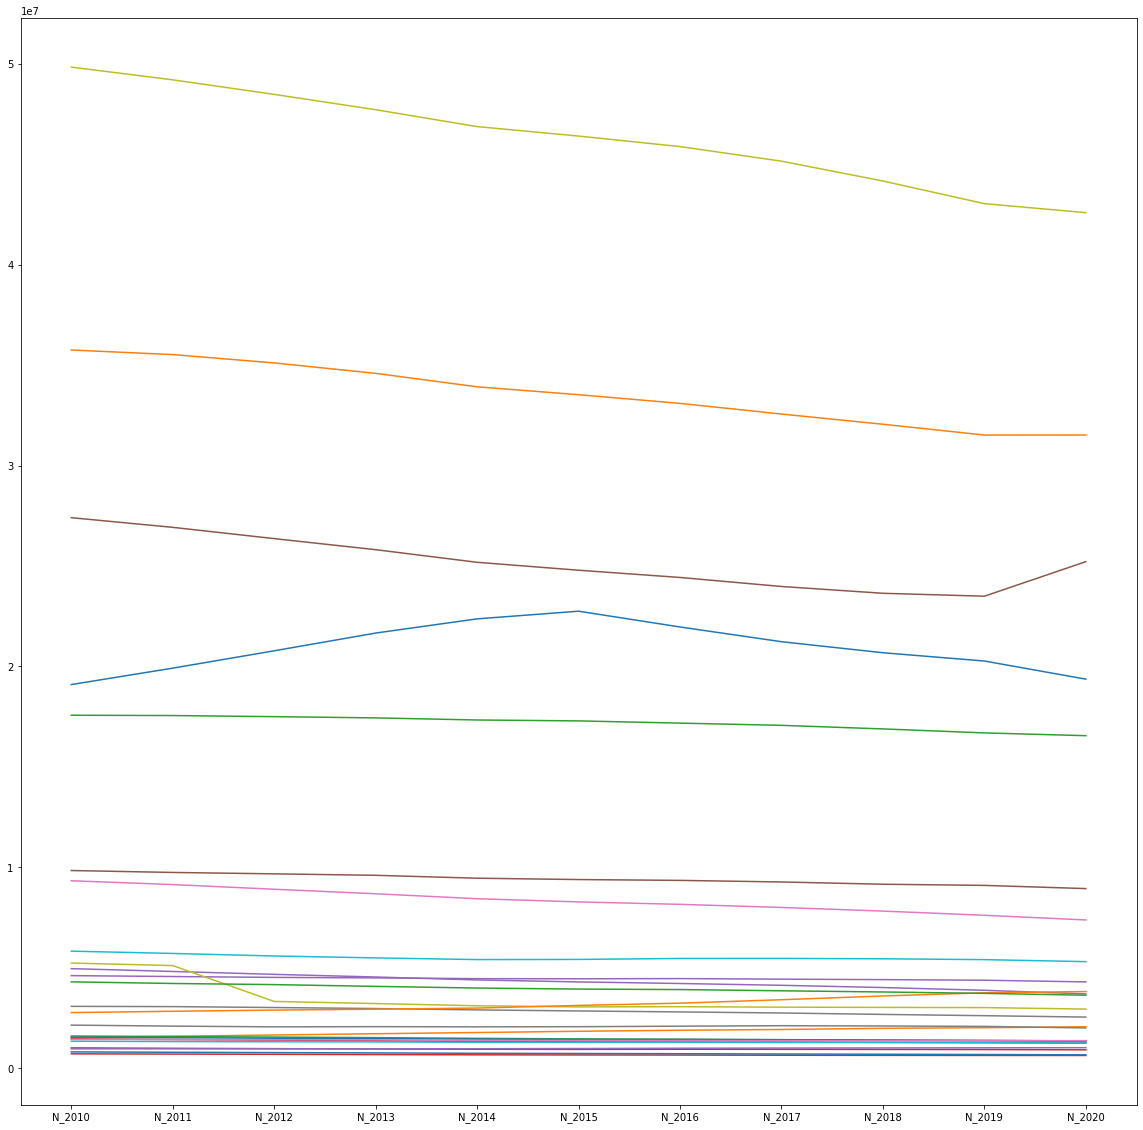

<Figure size 360x720 with 0 Axes>

In [147]:
fig = pylab.figure(figsize = (20,20))
figlegend = pylab.figure(figsize=(5,10))
ax = fig.add_subplot(111)
lines = ax.plot(df_joined_T)
figlegend.legend(lines, ('American', 'Arab','Czech','Danish','Dutch','English','French (except Basque)',
                         'French Canadian','German','Greek','Hungarian', 'Irish', 'Italian','Lithuanian',
                         'Norwegian','Polish','Portuguese','Russian','Scotch-Irish','Scottish','Slovak',
                         'Subsaharan African','Swedish','Swiss','Ukrainian'), 'center')

figlegend.savefig('legend.png')
fig.savefig('graph.png')


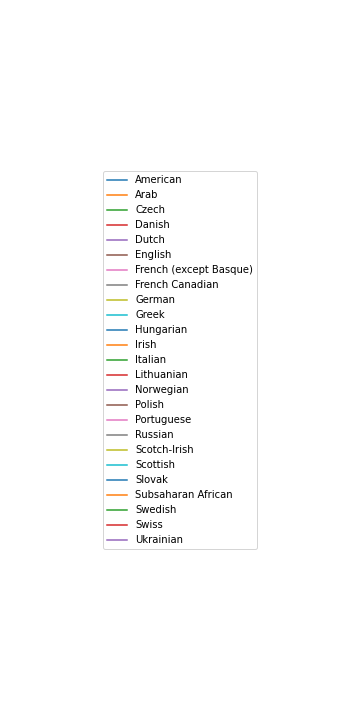

In [144]:
PATH = "/Users/Arnaud/Desktop/cs506-Project/Deliverable-2/"
Image(filename = PATH + "legend.png", width=500, height=500)

In [178]:
df_scaled = pd.DataFrame(df_joined_T)

In [179]:
df_scaled.to_csv('scaled.csv')

In [180]:
df_scaled.columns = df_scaled.columns.str.encode('ascii', 'ignore').str.decode('ascii')


In [181]:
df_scaled.columns

Index(['American', 'Arab', 'Czech', 'Danish', 'Dutch', 'English',
       'French(exceptBasque)', 'FrenchCanadian', 'German', 'Greek',
       'Hungarian', 'Irish', 'Italian', 'Lithuanian', 'Norwegian', 'Polish',
       'Portuguese', 'Russian', 'Scotch-Irish', 'Scottish', 'Slovak',
       'SubsaharanAfrican', 'Swedish', 'Swiss', 'Ukrainian'],
      dtype='object')

In [182]:
df_scaled = df_scaled.drop('American', 1)
df_scaled = df_scaled.drop('German', 1)
df_scaled = df_scaled.drop('Irish', 1)
df_scaled = df_scaled.drop('English', 1)
df_scaled = df_scaled.drop('Italian', 1)
df_scaled = df_scaled.drop('Polish', 1)
df_scaled = df_scaled.drop('French(exceptBasque)', 1)



/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_82799/1785503540.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled = df_scaled.drop('American', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_82799/1785503540.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled = df_scaled.drop('German', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_82799/1785503540.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled = df_scaled.drop('Irish', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_82799/1785503540.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled = df_scal

In [183]:
df_scaled

,Arab,Czech,Danish,Dutch,FrenchCanadian,Greek,Hungarian,Lithuanian,Norwegian,Portuguese,Russian,Scotch-Irish,Scottish,Slovak,SubsaharanAfrican,Swedish,Swiss,Ukrainian
N_2010,1517664,1595844,1453897,4950041,2138601,1337511,1537205,708860,4602337,1426121,3072756,5227821,5821321,805282,2763624,4293208,1003505,956896
N_2011,1584874,1569839,1420962,4809836,2087970,1319128,1511839,696686,4557539,1422191,3060143,5102732,5706263,786108,2828270,4211644,982909,958294
N_2012,1646808,1543224,1392161,4665736,2052405,1308335,1485671,684939,4514318,1409262,3013959,3317115,5580121,769697,2886972,4155453,967123,960902
N_2013,1710927,1514919,1360858,4533617,2061608,1300818,1468069,672154,4490532,1404692,2964169,3212402,5485459,754862,2931557,4067207,951617,958662
N_2014,1769645,1479588,1323182,4387814,2052979,1285866,1440762,659664,4451906,1380904,2895600,3102082,5401397,735757,2987143,3984136,936806,963549
N_2015,1832106,1452344,1307381,4289116,2059482,1284473,1423736,653137,4445030,1372141,2843400,3046005,5409343,725457,3119177,3933024,929291,973257
N_2016,1883456,1435359,1297738,4210787,2084903,1282655,1423144,648514,4454964,1367476,2795443,3056848,5457798,714557,3232142,3908762,937376,986597
N_2017,1920562,1410576,1294689,4121110,2109242,1272806,1414423,638018,4426556,1363703,2741864,3032134,5460745,700474,3402702,3847046,933084,995653
N_2018,1979363,1382835,1278457,4009279,2095503,1273100,1396014,632321,4403008,1358190,2671995,3021077,5440934,688103,3589855,3788741,927539,1002367
N_2019,2009626,1358610,1265727,3872651,2074567,1265177,1380914,628929,4373660,1368091,2608040,3011165,5398961,675728,3748931,3718915,921436,1009119


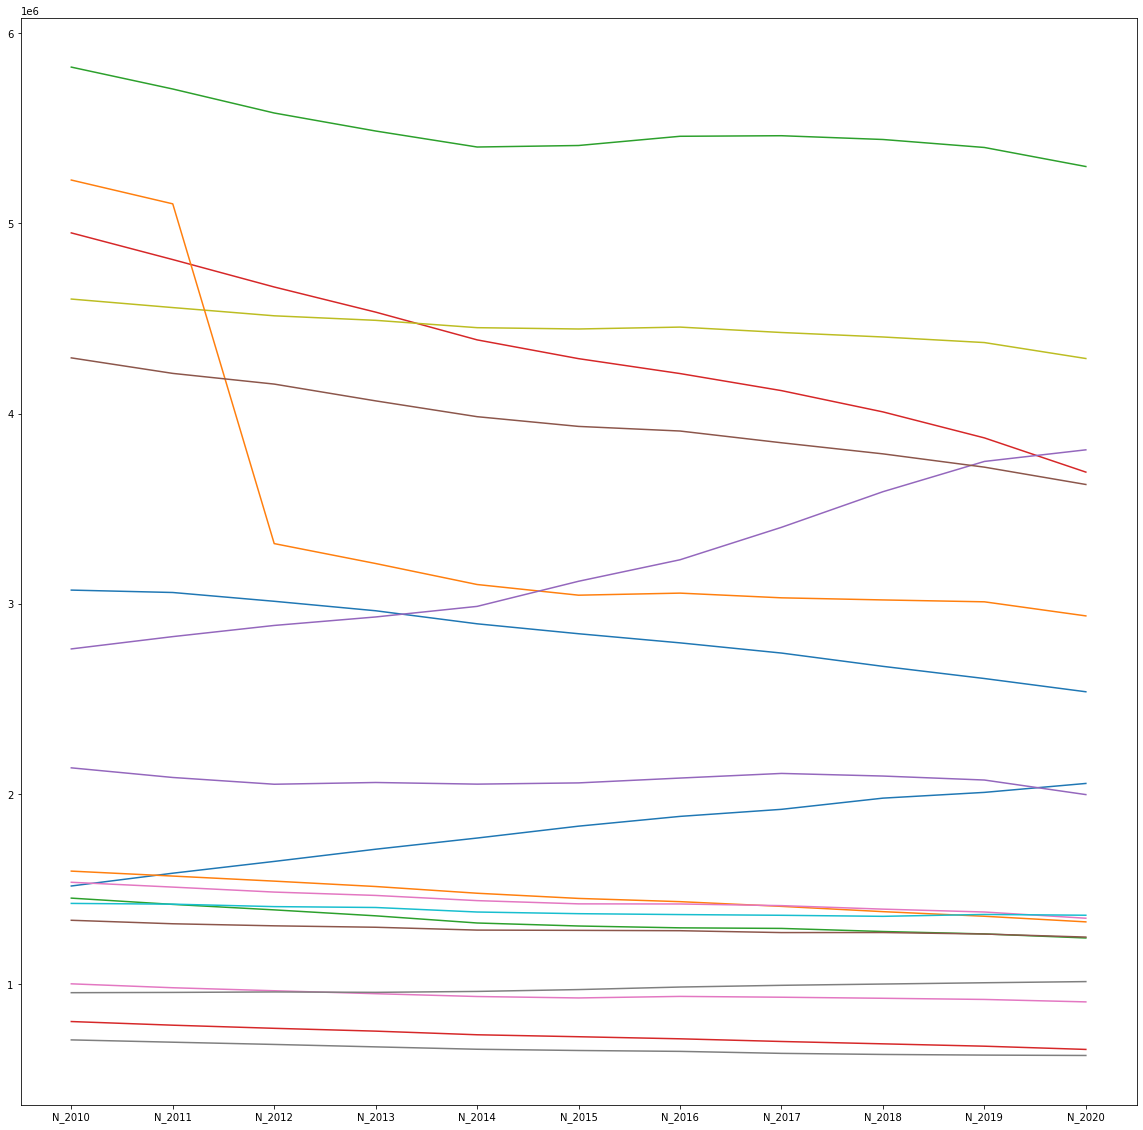

<Figure size 360x720 with 0 Axes>

In [185]:
fig_s = pylab.figure(figsize = (20,20))
figlegend_s = pylab.figure(figsize=(5,10))
ax_s = fig_s.add_subplot(111)
lines_s = ax_s.plot(df_scaled)
figlegend_s.legend(lines, ('Arab','Czech','Danish','Dutch',
                         'French Canadian','Greek','Hungarian','Lithuanian',
                         'Norwegian','Portuguese','Russian','Scotch-Irish','Scottish','Slovak',
                         'Subsaharan African','Swedish','Swiss','Ukrainian'), 'center')

figlegend_s.savefig('legend_s.png')
fig_s.savefig('graph_s.png')


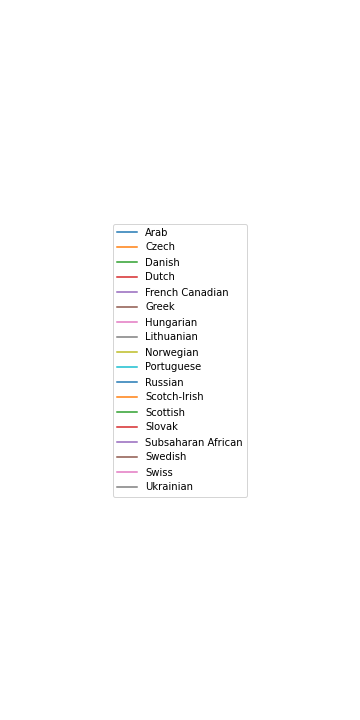

In [186]:
PATH = "/Users/Arnaud/Desktop/cs506-Project/Deliverable-2/"
Image(filename = PATH + "legend_s.png", width=500, height=500)